In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
ds = xr.open_dataset("regridding_on/prog.nc")
ini = xr.open_dataset("regridding_on/MOM_IC.nc")

In [4]:
ini

<xarray.Dataset>
Dimensions:          (lath: 3, lonh: 3, latq: 4, lonq: 4, Layer: 10,
                      Interface: 11, Time: 1)
Coordinates:
  * lath             (lath) float64 33.33 100.0 166.7
  * lonh             (lonh) float64 33.33 100.0 166.7
  * latq             (latq) float64 0.0 66.67 133.3 200.0
  * lonq             (lonq) float64 0.0 66.67 133.3 200.0
  * Layer            (Layer) float64 1.034e+03 1.034e+03 ... 1.036e+03 1.036e+03
  * Interface        (Interface) float64 1.034e+03 1.034e+03 ... 1.036e+03
  * Time             (Time) timedelta64[ns] 00:00:00
Data variables: (12/25)
    Temp             (Time, Layer, lath, lonh) float64 ...
    Salt             (Time, Layer, lath, lonh) float64 ...
    h                (Time, Layer, lath, lonh) float64 ...
    u                (Time, Layer, lath, lonq) float64 ...
    v                (Time, Layer, latq, lonh) float64 ...
    ave_ssh          (Time, lath, lonh) float64 ...
    ...               ...
    diffu            (Time, Layer, lath, lonq) float64 ...
    diffv            (Time, Layer, latq, lonh) float64 ...
    ubtav            (Time, lath, lonq) float64 ...
    vbtav            (Time, latq, lonh) float64 ...
    DTBT             (Time) timedelta64[ns] ...
    eta              (Time, Interface, lath, lonh) float64 ...
Attributes:
    filename:  ./MOM_IC.nc

In [6]:
ds

<xarray.Dataset>
Dimensions:  (xq: 4, yh: 3, zl: 10, Time: 4, xh: 3, yq: 4, zi: 11)
Coordinates:
  * xq       (xq) float64 0.0 66.67 133.3 200.0
  * yh       (yh) float64 33.33 100.0 166.7
  * zl       (zl) float64 1.034e+03 1.034e+03 1.034e+03 ... 1.036e+03 1.036e+03
  * Time     (Time) object 0001-01-06 00:00:00 ... 0001-01-21 00:00:00
  * xh       (xh) float64 33.33 100.0 166.7
  * yq       (yq) float64 0.0 66.67 133.3 200.0
  * zi       (zi) float64 1.034e+03 1.034e+03 1.034e+03 ... 1.036e+03 1.036e+03
Data variables:
    u        (Time, zl, yh, xq) float32 ...
    v        (Time, zl, yq, xh) float32 ...
    h        (Time, zl, yh, xh) float64 ...
    e        (Time, zi, yh, xh) float32 -7.674e-13 -7.674e-13 ... -2e+03 -2e+03
    temp     (Time, zl, yh, xh) float32 ...
    salt     (Time, zl, yh, xh) float32 ...
    ea       (Time, zl, yh, xh) float32 ...
    eb       (Time, zl, yh, xh) float32 ...
    wd       (Time, zi, yh, xh) float32 ...
Attributes:
    filename:   prog.nc
    title:      MOM resting experiment
    grid_type:  regular
    grid_tile:  N/A

Initial depths: [[    0.  -200.  -400.  -600.  -800. -1000. -1200. -1400. -1600. -1800.
  -2000.]]
w_otec= <xarray.DataArray 'e' ()>
array(0.0001)
Coordinates:
    zi       float64 0.0


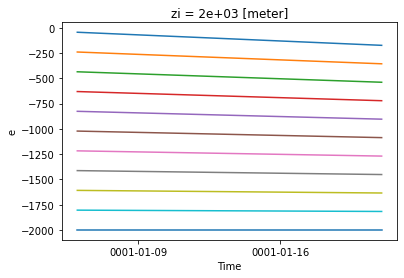

In [5]:
# Graph the depth of each layer over time
print('Initial depths:', ini['eta'].mean(['lath', 'lonh']).data)
e = ds['e'].mean(['yh', 'xh'])
for z in ds['zi']:
    e.sel(zi=z).plot()
    
# Reverse engineer the value of w_otec.
print('w_otec=', (e[0,0] - e[1,0])/(5*24*3600))

(2000.0, 0.0)

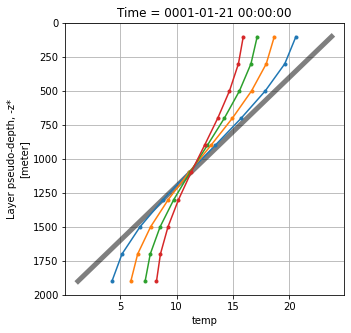

In [6]:
plt.figure(figsize=(5,5))

ini['Temp'].mean(['lath', 'lonh']).plot(y='Layer', color='k', lw=5., alpha=0.5)
for t in ds['Time']:
    ds['temp'].sel(Time=t).mean(['xh', 'yh']).plot(y='zl', marker=".")
plt.grid(True)
plt.ylim(2000, 0)